<h1>A/B Testing</h1>

<p><b>Objective: </b>to reveal weather there is a significant difference in the performance of two study groups</p>
<p><b>Data:</b> was taken from Kaggle.com</p>
<p><b>Source:</b> <a href="https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing">Click Here</a></p><br />
<b>About this file: columns description</b><br />

auction_id: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.<br />

experiment: which group the user belongs to - control or exposed.<br />
control: users who have been shown a dummy ad<br />
exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand.<br />

date: the date in YYYY-MM-DD format<br />

hour: the hour of the day in HH format.<br />

device_make: the name of the type of device the user has e.g. Samsung<br />

platform_os: the id of the OS the user has.<br />

browser: the name of the browser the user uses to see the BIO questionnaire.<br />

yes: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.<br />

no: 1 if the user chooses the “No” radio button for the BIO questionnaire.<br />

![A/B - Testing](./imgs/3.png "A/B Testing")

In [2]:
# import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

from scipy.stats import stats
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option("display.max_columns", None)

In [3]:
# loading file
path = "./data/raw/AdSmartABdata - AdSmartABdata.csv"
df = pd.read_csv(path)
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


<h3>Wrangling</h3>

In [4]:
# check for missing values
def check_is_null(data):  
    col_names = list(data.columns)
    
    for i in col_names:
        print(f"'{i.upper()}' missing values: {sum(data[i].isnull())}")

In [5]:
check_is_null(df)

'AUCTION_ID' missing values: 0
'EXPERIMENT' missing values: 0
'DATE' missing values: 0
'HOUR' missing values: 0
'DEVICE_MAKE' missing values: 0
'PLATFORM_OS' missing values: 0
'BROWSER' missing values: 0
'YES' missing values: 0
'NO' missing values: 0


In [6]:
# check for duplicates
print(f"# duplicate rows: {sum(df.duplicated())}")

# duplicate rows: 0


In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [8]:
# check for unique values of each column
def check_for_unique_values(data):
    col_names = list(data.columns)
    
    for i in col_names:
        print(f"'{i.upper()}' has -- {len(data[i].unique())} -- unique values.")

In [9]:
check_for_unique_values(df)

'AUCTION_ID' has -- 8077 -- unique values.
'EXPERIMENT' has -- 2 -- unique values.
'DATE' has -- 8 -- unique values.
'HOUR' has -- 24 -- unique values.
'DEVICE_MAKE' has -- 269 -- unique values.
'PLATFORM_OS' has -- 3 -- unique values.
'BROWSER' has -- 15 -- unique values.
'YES' has -- 2 -- unique values.
'NO' has -- 2 -- unique values.


In [10]:
# statistical summary
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [11]:
# feature engineering: adding a new column 'ingnored' that represents users who ignored BIO completly
df['ignored'] = list(map(lambda x, y: 1 if ((x == 0) & (y == 0)) else 0, df['yes'], df['no']))
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,ignored
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,1
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,1
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,1
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,1
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,1
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,1
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,1


In [12]:
# statistical summary by group
def get_stat_summary_by_group(data, col_names, multi_grouping=[]):
    for i in col_names:
        print(f"By {i.upper()}...")
        if multi_grouping == []:
            print(data.groupby('experiment')[i].agg(['mean', 'median', 'min', 'max', 'std', 'count']))
        else:
            print(data.groupby(multi_grouping)[i].agg(['mean', 'median', 'min', 'max', 'std', 'count']))
        print("________________________________________________________\n")

In [13]:
get_stat_summary_by_group(df, ['hour', 'platform_os', 'yes', 'no', 'ignored'])

By HOUR...
                 mean  median  min  max       std  count
experiment                                              
control     12.499140      15    0   23  5.331095   4071
exposed     10.716675      10    0   23  5.986323   4006
________________________________________________________

By PLATFORM_OS...
                mean  median  min  max       std  count
experiment                                             
control     5.924343       6    5    6  0.264481   4071
exposed     5.970295       6    5    7  0.171259   4006
________________________________________________________

By YES...
                mean  median  min  max       std  count
experiment                                             
control     0.064849       0    0    1  0.246289   4071
exposed     0.076885       0    0    1  0.266442   4006
________________________________________________________

By NO...
                mean  median  min  max       std  count
experiment                                    

In [14]:
# stat summary by group: using multi columns
get_stat_summary_by_group(df, ['hour', 'platform_os', 'yes', 'no', 'ignored'], multi_grouping=['experiment' ,'browser'])

By HOUR...
                                            mean  median  min  max       std  \
experiment browser                                                             
control    Android                     15.000000      15   15   15       NaN   
           Chrome                      15.000000      15   15   15       NaN   
           Chrome Mobile               12.475104      15    0   23  5.357265   
           Chrome Mobile WebView       11.965753      15    0   23  5.530191   
           Chrome Mobile iOS           13.000000      15    1   23  5.075192   
           Facebook                    12.784314      15    0   23  5.119100   
           Mobile Safari               11.808943      15    0   22  5.982976   
           Mobile Safari UI/WKWebView  14.433333      15    1   23  4.775536   
           Opera Mini                  15.000000      15   15   15       NaN   
           Pinterest                   14.000000      14   13   15  1.414214   
           Puffin            

<p><b>Note: </b>as we can see more users in the 'exposed' group responded YES to BIO questionary. Also, we could add that users are more active toward BIO questionary in the 'exposed' group than in the 'control' by having a mean lower in the 'IGNORED' (yes/no) column.</p>

<h3>EDA</h3>

In [15]:
# graph: histogram
def show_hist(data, col_names):
    for i in col_names:
        _ = sns.histplot(data=data, x=i, hue='experiment', bins=10)
        _ = plt.title(f"HISTOGRAM - by '{i.upper()}' column")
        plt.show()
        
    return None

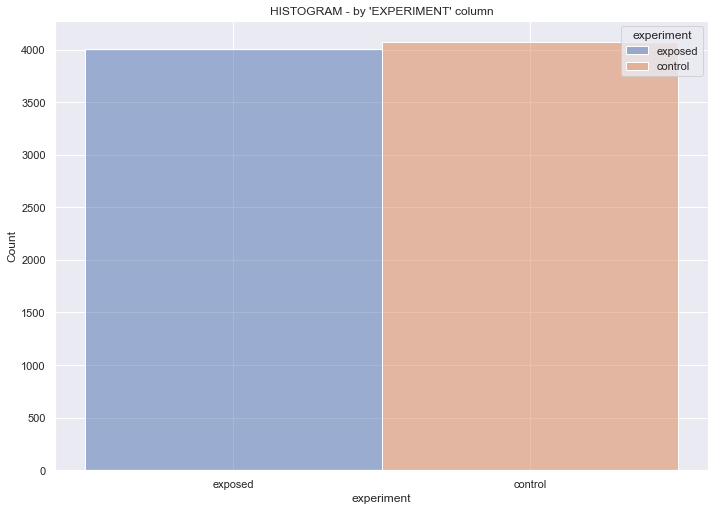

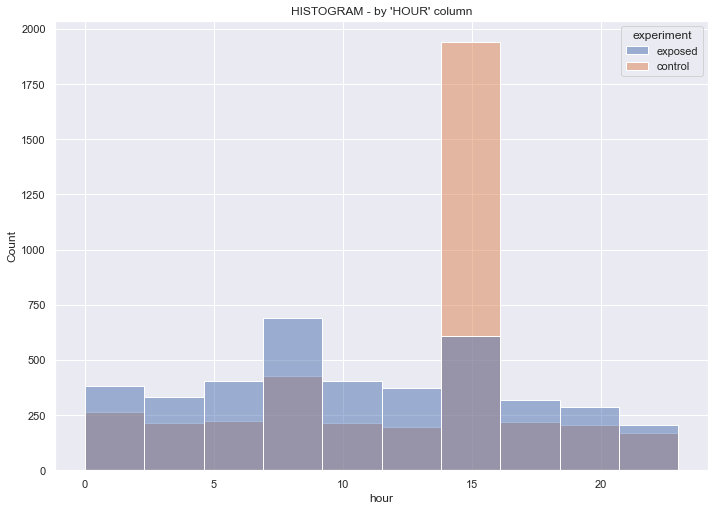

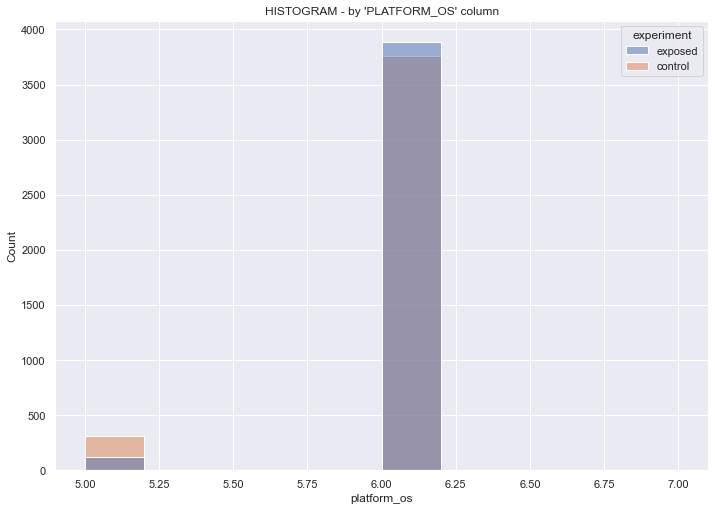

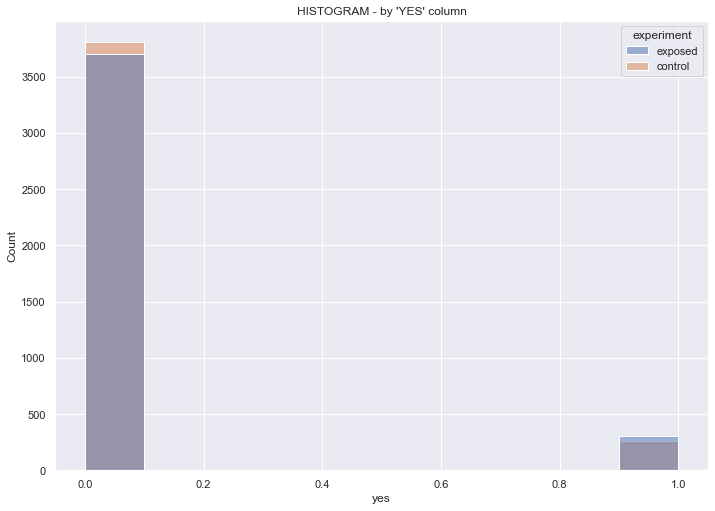

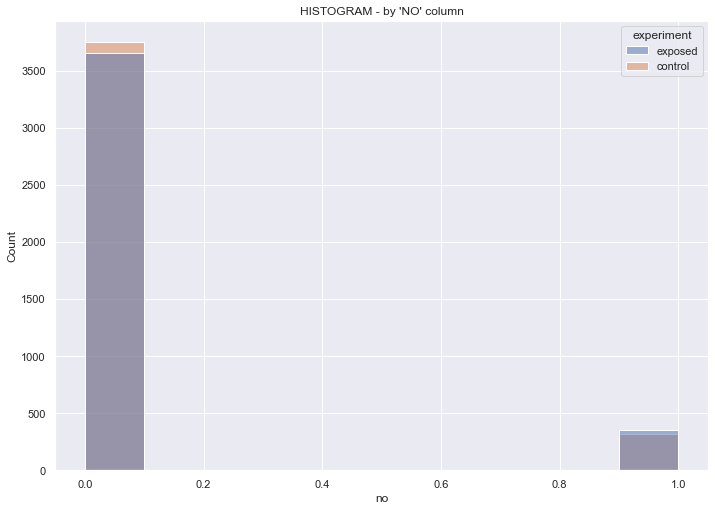

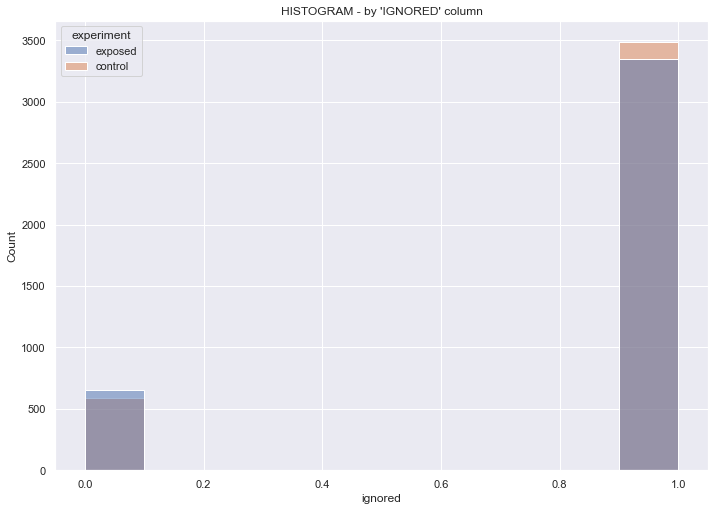

In [16]:
show_hist(df, ['experiment', 'hour', 'platform_os', 'yes', 'no', 'ignored'])

In [17]:
# graph: boxplot
def show_boxplot(data, col_names):
    for i in col_names:
        _ = sns.boxplot(data=data, x='experiment', y=i)
        _ = plt.title(f"BOXPLOT - by '{i.upper()}' column")
        plt.show()

    return None

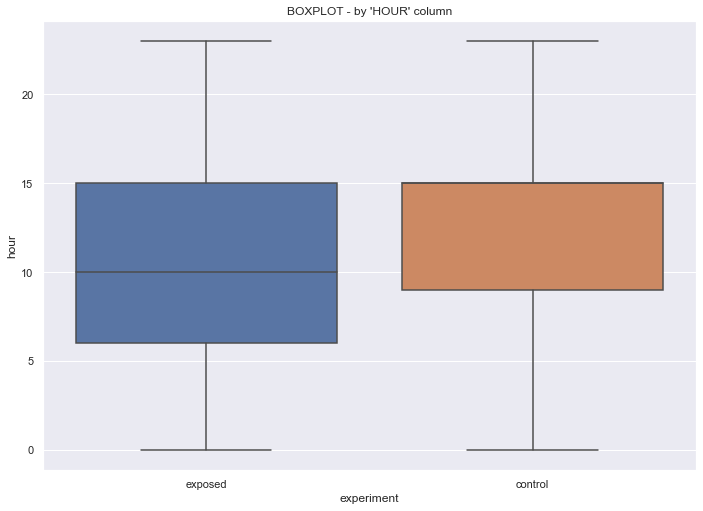

In [18]:
show_boxplot(df, ['hour'])

In [19]:
# converting column 'date' into 'datetime' format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dtypes

auction_id             object
experiment             object
date           datetime64[ns]
hour                    int64
device_make            object
platform_os             int64
browser                object
yes                     int64
no                      int64
ignored                 int64
dtype: object

In [20]:
# graph: boxplot
def show_lineplot(data, col_names):
    for i in col_names:
        _ = sns.lineplot(data=data, x='date', y=i, hue='experiment')
        _ = plt.title(f"LINEPLOT - by '{i.upper()}' column")
        plt.show()

    return None

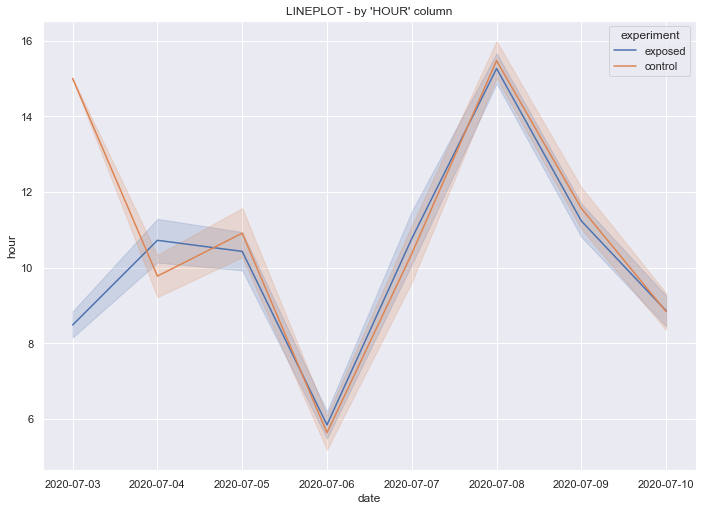

In [21]:
show_lineplot(df, ['hour'])

<h3>A/B Test</h3>
<p>Because we’re performing an A/B Test on conversions which is a categorical variable that follows a Bernoulli distribution, we’ll be using the Chi-Squared Test.</p>

In [22]:
# applying crosstab function to our groups before apply chi-squared test
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(df['experiment'], df['yes'], margins=True)

yes,0,1,All
experiment,,,
control,3807,264,4071
exposed,3698,308,4006
All,7505,572,8077


In [23]:
# performing Pearson's chi-squared test: because we have large sample size
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi_sq_stat, p_value, dof, expected = chi2_contingency([[3807, 264], [3698, 308]])

print(f"Chi-squared statistics: {chi_sq_stat}")
print(f"P-value: {p_value}")
print(f"Degree of freedom: {dof}")
print(f"Expected value: \n{expected}")

Chi-squared statistics: 4.263867257547753
P-value: 0.03893119708315394
Degree of freedom: 1
Expected value: 
[[3782.69840287  288.30159713]
 [3722.30159713  283.69840287]]


In [24]:
# interpret p-value
alpha = 0.05

print(f"P-value: {p_value}")
if p_value <= alpha:
    print(f"We REJECT the null hypothesis for this test is that there is NO significance between version_A and version_B of BIO-questionary")
else:
    print(f"We FAIL to reject the null hypothesis for this test is that there is NO significance between version_A and version_B of BIO-questionary")

P-value: 0.03893119708315394
We REJECT the null hypothesis for this test is that there is NO significance between version_A and version_B of BIO-questionary


In [25]:
# verifying the above result by calculation the ration of two groups
group_A_ration = sum(df[df['experiment'] == 'control']['yes']) / len(df[df['experiment'] == 'control']['yes'])
group_B_ration = sum(df[df['experiment'] == 'exposed']['yes']) / len(df[df['experiment'] == 'exposed']['yes'])

print(f"Group A /click by total clicks ratio/: {round(group_A_ration, 4)}%")
print(f"Group B /click by total clicks ratio/: {round(group_B_ration, 4)}%")
print(f"Group B have gone through BIO questionry more than group A by {round(group_B_ration - group_A_ration, 4)}%")

Group A /click by total clicks ratio/: 0.0648%
Group B /click by total clicks ratio/: 0.0769%
Group B have gone through BIO questionry more than group A by 0.012%


<h3>Summary:</h3>
<p>Because we had Bernoulli Distribution (the discrete probability distribution that has a probability of being 1 and a probability of being 0) we chose the Chi-Squared Test to conduct our answer.<br />
Based on the received results where we rejected the null hypothesis where group_A and group_B are not significant, we came to the conclusion that:<br />
Users in group_B (exposed) has more probability to go through the BIO questionary than users in group_A (control).<br />
Advice: go with group_B (exposed).<br />
Suggestion: duration time for the test could be extended for further analyses and more accurate results.</p></p>